In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras

from keras import models 
from keras import layers 
from keras import optimizers 
from keras import utils
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator 
from keras.datasets import fashion_mnist 


In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"x_train: {x_train.shape}, y_train: {y_train.shape} , x_test: {x_test.shape}, y_test: {y_test.shape}")

x_train: (50000, 32, 32, 3), y_train: (50000, 1) , x_test: (10000, 32, 32, 3), y_test: (10000, 1)


In [3]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784
classes = { 0:"airplane(літак)", 
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кот)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

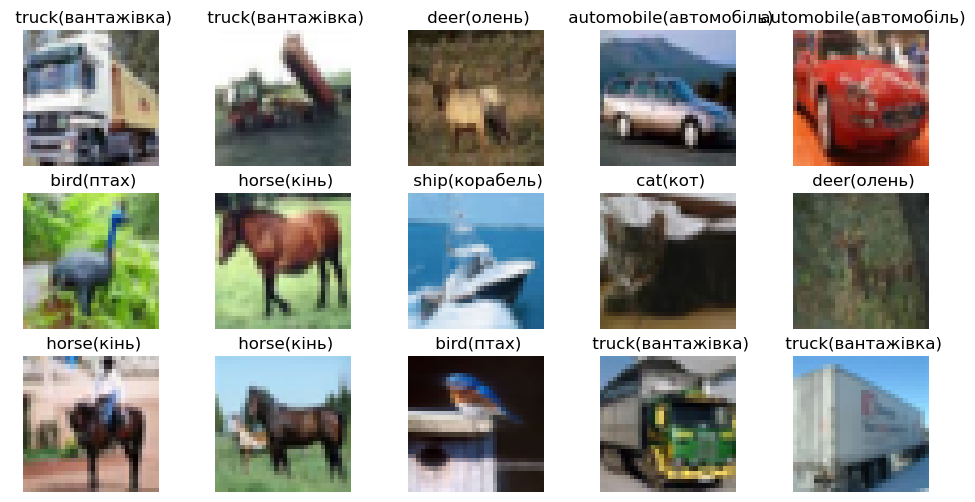

In [5]:

plt.figure(figsize=(12,6))
for i in range(1, 16):
  plt.subplot(3, 5, i-1 + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f" {classes[y_train[i][0]]}")


In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("x_train normalize shape", x_train.shape)
print("x_test normalize shape", x_test.shape)

x_train normalize shape (50000, 32, 32, 3)
x_test normalize shape (10000, 32, 32, 3)


In [5]:

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Перетворюємо матриці розміром 28x28 пікселів у вектор 
x_train, x_valid, x_test = x_train.reshape(x_train.shape[0], 32, 32, 3 ), x_valid.reshape(x_valid.shape[0], 32, 32, 3), x_test.reshape(10000,32, 32, 3 )

# Нормалізуємо значення пікселів
# x_train, x_test = x_train.astype("float32") / 255, x_test.astype("float32") / 255
y_train, y_valid, y_test = utils.to_categorical(y_train, num_classes), utils.to_categorical(y_valid, num_classes), utils.to_categorical(y_test, num_classes)

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape},        y_test: {y_test.shape}")
print(f"x_valid: {x_valid.shape},  y_valid: {y_valid.shape}")

x_train: (45000, 32, 32, 3), x_test: (10000, 32, 32, 3)
y_train: (45000, 10),        y_test: (10000, 10)
x_valid: (5000, 32, 32, 3),  y_valid: (5000, 10)


In [6]:
# x_train = tf.keras.layers.Concatenate()([x_train, x_train, x_train])
# x_test = tf.keras.layers.Concatenate()([x_test, x_test, x_test]) 

print(  'train ', x_train.shape) 

train  (45000, 32, 32, 3)


In [7]:
from keras import layers
from keras import models

# model = models.Sequential([
#     layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu", input_shape=(32,  32, 3)),
#     layers.MaxPooling2D(pool_size=2),
#     layers.Dropout(0.3),

#     layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"),
#     layers.MaxPooling2D(pool_size=1),
#     layers.Dropout(0.3),

#     layers.Conv2D(filters=32, kernel_size=2, activation="relu"),
#     layers.Dropout(0.3),
#     layers.Flatten(),

#     layers.Dense(128, activation="relu"),
#     layers.Dropout(0.3),
#     layers.Dense(10, activation="softmax")])

model = models.Sequential([
      layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,  32, 3)),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.3),
      layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.3),

      layers.Flatten(),
      layers.Dense(512, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0

In [9]:
model.compile(  optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [10]:

history = model.fit(x_train, y_train, epochs=20,batch_size=64, validation_data=(x_valid, y_valid))

Epoch 1/20
704/704 [==============================] - 41s 56ms/step - loss: 1.6613 - accuracy: 0.3980 - val_loss: 1.3430 - val_accuracy: 0.5234
Epoch 2/20
704/704 [==============================] - 36s 52ms/step - loss: 1.3420 - accuracy: 0.5180 - val_loss: 1.1648 - val_accuracy: 0.5940
Epoch 3/20
704/704 [==============================] - 33s 47ms/step - loss: 1.2124 - accuracy: 0.5666 - val_loss: 1.0825 - val_accuracy: 0.6276
Epoch 4/20
704/704 [==============================] - 33s 47ms/step - loss: 1.1265 - accuracy: 0.6000 - val_loss: 1.0119 - val_accuracy: 0.6392
Epoch 5/20
704/704 [==============================] - 33s 47ms/step - loss: 1.0699 - accuracy: 0.6232 - val_loss: 0.9709 - val_accuracy: 0.6546
Epoch 6/20
704/704 [==============================] - 34s 48ms/step - loss: 1.0208 - accuracy: 0.6363 - val_loss: 0.9221 - val_accuracy: 0.6860
Epoch 7/20
704/704 [==============================] - 33s 47ms/step - loss: 0.9817 - accuracy: 0.6532 - val_loss: 0.8864 - val_accuracy:

In [14]:
result_test = model.evaluate(x_test, y_test)
# result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
# print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

313/313 [==============================] - 3s 8ms/step - loss: 0.8015 - accuracy: 0.7192
Відсоток точності тестових даних:  71.92


In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


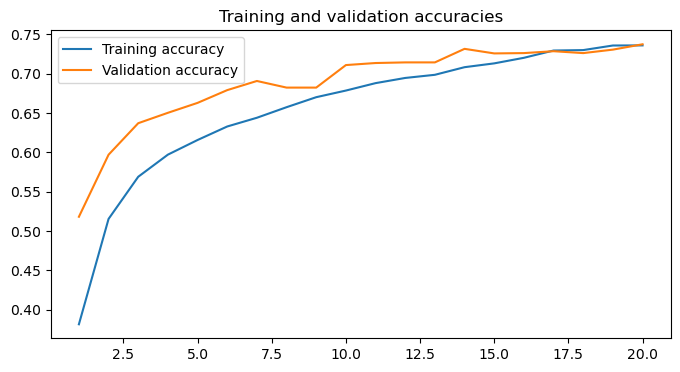

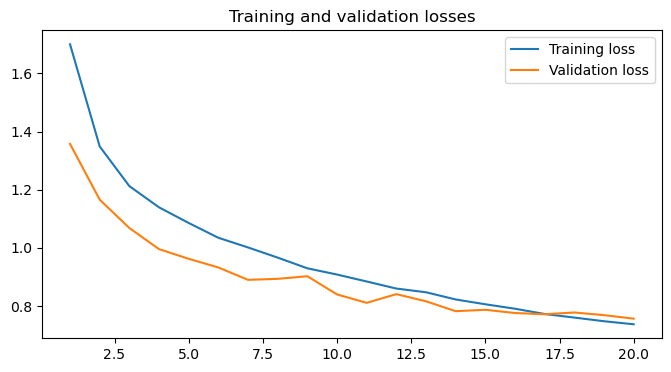

In [ ]:
epochs = range(1, len(history.history["accuracy"]) + 1) 

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"],   label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy") 
plt.title("Training and validation accuracies") 
plt.legend() 
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history.history["loss"],  label="Training loss") 
plt.plot(epochs, history.history["val_loss"], label="Validation loss") 
plt.title("Training and validation losses") 
plt.legend()
plt.show()

In [13]:
model.save("basesd_model_CNN.hdf5")

In [ ]:
# model = models.load_model("basesd_model_1.hdf5")

Донавчання